In [348]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, FeatureHasher
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns

In [349]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [350]:
ep = pd.read_csv('ep_desc.csv', index_col=0)
ep.shape

(176, 4)

In [351]:
ep

,season,ep,title,summary
0,1,1-2,Encounter at Farpoint,Essentially everything and everyone in the ne...
0,1,3,The Naked Now,In what today might be called a reboot of the...
0,1,4,Code of Honor,The “fight to the death” tope and Lt
0,1,5,The Last Outpost,This introduction to the hypercapitalist Fere...
0,1,6,Where No One Has Gone Before,Recalling the original series pilot “Where No...
...,...,...,...,...
0,7,21,Firstborn,Squeezing as much out of the Alexander charac...
0,7,22,Bloodlines,After a hasty viewing of Star Treks II and II...
0,7,23,Emergence,Very reminiscent of “Phatasms” in tone and st...
0,7,24,Preemptive Strike,Despite serious misgivings and hints of confl...


In [352]:
countv = CountVectorizer(ngram_range=(1,4))

In [353]:
doc_word_matrix = countv.fit_transform(ep.summary)
doc_word_matrix

<176x10837 sparse matrix of type '<class 'numpy.int64'>'
	with 13408 stored elements in Compressed Sparse Row format>

In [354]:
doc_word_df = pd.DataFrame(doc_word_matrix.A, columns=countv.get_feature_names())
doc_word_df.shape

(176, 10837)

In [355]:
doc_word_df

,000,000 have,000 have been,000 have been killed,000 years,000 years ago,10,10 998,10 998 of,10 998 of federation,...,young due,young due to,young due to some,your,your clash,your clash of,your clash of generations,your iphone,your iphone 25,your iphone 25 years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
# svd = TruncatedSVD(n_components=50)

In [357]:
# svd.fit_

In [358]:
km = KMeans(n_clusters=5)
km.fit(doc_word_matrix)

KMeans(n_clusters=5)

In [359]:
clusters = km.predict(doc_word_matrix)

In [360]:
clusters

array([3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 2, 3, 2, 1,
       0, 3, 1, 1, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 1, 2, 1, 1, 3, 1, 1, 3,
       2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4,
       3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3],
      dtype=int32)

In [361]:
def plot_sil_inertia_KM(doc, kmin=2, kmax=20):

    output = []
    sill = []

    for i in range(kmin,kmax+1):
        model = KMeans(n_clusters=i)
        model.fit(doc)
        output.append(model.inertia_)
        sill.append(silhouette_score(doc, labels=model.labels_))

    fig, ax = plt.subplots()
    #plt.plot(range(2,11), output)
    l1, = ax.plot(range(kmin,kmax+1), output, linestyle='-', color='green')
   # ax.vlines(x=12, ymin=0, ymax=10, color='red', linestyle='--')
    ax2 = ax.twinx()
    l2, = ax2.plot(range(kmin,kmax+1), sill)
    plt.xticks(range(kmin,kmax+1));
    plt.title(f'K-Means Inertia / Silhouette Score\n{kmin}-{kmax} Ks')
    ax.set_xlabel('K')
    ax.set_ylabel('Inertia')
    ax2.set_ylabel('Silhouette Score')
    plt.legend(handles = [l1, l2],
               labels = ['Inertia', 'Silhouette Score'],
               loc='lower right')
    #fig.savefig('plottemp.jpg')



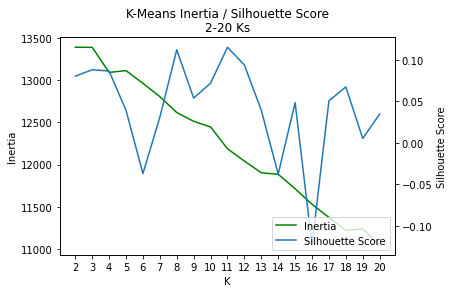

In [362]:
plot_sil_inertia_KM(doc_word_matrix)

In [363]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer 

stop_words = ENGLISH_STOP_WORDS.union(['star', 'trek', 'episode', 'character','fans'])

tfidf = TfidfVectorizer(stop_words=stop_words)

# note you can also set n_components directly here if you want
# a lower dimensional projection
pca = PCA(n_components=50, random_state=42)

X1 = tfidf.fit_transform(ep.summary)
X = pca.fit_transform(X1.toarray())

X1.shape, X.shape

((176, 1217), (176, 50))

In [364]:
def show_variance_explained_plots(pca):
    
    var_exp_array = pca.explained_variance_ratio_
    n_comps = var_exp_array.shape[0] 
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    ax[0].fill_between(range(n_comps), var_exp_array)
    ax[0].set_title('Variance Explained by Nth Principal Component')
    
    ax[1].fill_between(range(n_comps), np.cumsum(var_exp_array))
    ax[1].set_title('Cumulative Variance Explained by N Components')
    
    plt.show()

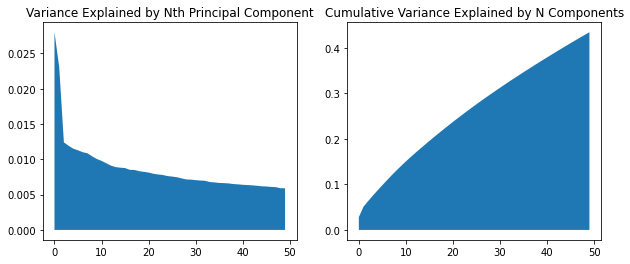

In [365]:
show_variance_explained_plots(pca)

In [366]:
from sklearn.cluster import KMeans

k_means_cluster = KMeans(n_clusters=3, random_state=42)

cluster_labels = k_means_cluster.fit_predict(X)

In [367]:
cluster_labels

array([2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2],
      dtype=int32)

In [368]:
def show_cluster_stats(cluster_labels):
    
    tot = len(cluster_labels)
    
    pctl = []
    for c in sorted(set(cluster_labels)):    
        pct = len(cluster_labels[cluster_labels == c]) / tot
        print('Percentage in cluster {}: {}'.format(c, pct))
#         #pctl.append(pct)
#         for i in range(5):
#             print(ep[cluster_labels==c]['title'])
#         print()
    
#     sns.barplot(x=cluster_labels, y=pctl)
#     plt.title('Percentage sentiment label vs. cluster label')

show_cluster_stats(cluster_labels)

Percentage in cluster 0: 0.028409090909090908
Percentage in cluster 1: 0.5625
Percentage in cluster 2: 0.4090909090909091


In [369]:
ep[cluster_labels==4].summary

Series([], Name: summary, dtype: object)

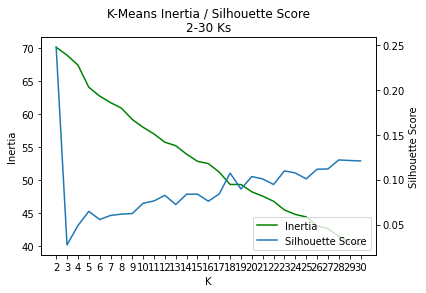

In [372]:
plot_sil_inertia_KM(X,2,30)

In [248]:
X1

<176x1217 sparse matrix of type '<class 'numpy.float64'>'
	with 1958 stored elements in Compressed Sparse Row format>

In [249]:
X1.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [228]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [229]:
display_topics(pca, tfidf.get_feature_names(), 5)


Topic  0
dr, picard, lt, and, terrorist

Topic  1
lt, mission, away, fight, tope

Topic  2
the, of, next, lt, generation

Topic  3
this, of, time, one, favorite

Topic  4
enterprise, in, the, an, away

Topic  5
with, to, in, worf, of

Topic  6
picard, and, captain, riker, ro

Topic  7
is, as, that, not, his

Topic  8
head, trip, data, with, it

Topic  9
tng, captain, it, as, more

Topic  10
is, his, one, enterprise, as

Topic  11
this, one, troi, and, data

Topic  12
any, series, is, in, more

Topic  13
data, is, who, riker, more

Topic  14
for, definitely, story, when, one

Topic  15
it, data, vs, generation, next

Topic  16
ambassador, this, he, federation, you

Topic  17
this, some, when, data, before

Topic  18
on, come, series, story, as

Topic  19
some, for, holodeck, years, as

Topic  20
before, on, troi, mission, has

Topic  21
when, not, ship, from, does

Topic  22
troi, riker, are, has, commander

Topic  23
time, his, favorite, season, ship

Topic  24
he, by, romulan, finds,

In [254]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(ep.summary)
doc_word.shape

(176, 1222)

In [255]:
lsa = TruncatedSVD(2)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.01646055, 0.02632112])

In [260]:
doc_topic.shape

(176, 2)

In [257]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word

,000,10,11,1984,1991,20,200,24th,25,998,...,worth,wouldn,wraps,wussification,xi,yar,yeah,years,yes,young
component_1,0.006,0.003,0.003,0.000,0.01,0.010,0.011,0.003,0.01,0.003,...,0.002,0.011,0.012,0.011,0.007,0.0,0.013,0.052,0.020,0.005
component_2,0.004,0.001,0.001,-0.001,0.02,-0.008,0.015,-0.007,0.02,0.001,...,-0.000,-0.019,-0.009,-0.019,-0.016,-0.0,-0.024,0.039,-0.028,-0.006


In [261]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = ep.summary,
             columns = ["component_1","component_2" ])
Vt.tail()

,component_1,component_2
summary,,
"Squeezing as much out of the Alexander character as possible, here’s an episode with Worf trying to make the boy more appreciative of his Klingon cultural heritage",0.70280,-0.39283
"After a hasty viewing of Star Treks II and III, Cardassian baddie Daimon Bok seeks to exact revenge on Picard by killing the son he never knew he had",0.60251,-0.83950
"Very reminiscent of “Phatasms” in tone and style, “Emergence” is unfortunately made all the more insipid by involving a malfunctioning holodeck as primary to the plot",0.11253,-0.05603
"Despite serious misgivings and hints of conflicting loyalty, Picard nevertheless sends Ensign Ro on a difficult assignment involving terrorists",0.39862,-0.40756
"Fantastic stuff that wraps seven seasons of ST:TNG beautifully with a story containing all the hallmarks of the show: A head trip, time paradoxes, Q and lots of screen time for Picard",1.10761,-0.51862


## NMF



In [267]:
ex_label = [e[:50]+"..." for e in ep.summary]

In [374]:
#vectorizer = CountVectorizer(stop_words = 'english')

stop_words = ENGLISH_STOP_WORDS.union(['star', 'trek', 'episode', 'character','fans', 'tng'])


vectorizer = TfidfVectorizer(stop_words = stop_words, ngram_range=(1,3), use_idf=True)

doc_word = vectorizer.fit_transform(ep.summary)
doc_word.shape

pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).head(10)

,000,000 killed,000 killed planet,000 years,000 years ago,10,10 998,10 998 federation,11,11 000,...,yes,yes offers,yes offers help,young,young alexander,young alexander adapting,young boy,young boy centered,young pharmaceutical,young pharmaceutical chemical
Essentially everything and everyone in the new ST...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
In what today might be called a reboot of the ori...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The “fight to the death” tope and Lt...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
This introduction to the hypercapitalist Ferengi ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Recalling the original series pilot “Where No Man...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"As the Enterprise passes through a nebula, a dise...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"On a neo-hippie utopia planet, Wesley is given th...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Ferengi captain seeks vengeance against Picard ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The intergalactic Loki is back in a rather simpli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Majel Barrett plays her fifth different character...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_word)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [376]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = [f"component_{i}" for i,_ in enumerate(nmf_model.components_)],
             columns = vectorizer.get_feature_names())
topic_word

,000,000 killed,000 killed planet,000 years,000 years ago,10,10 998,10 998 federation,11,11 000,...,yes,yes offers,yes offers help,young,young alexander,young alexander adapting,young boy,young boy centered,young pharmaceutical,young pharmaceutical chemical
component_0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_2,0.022,0.016,0.016,0.008,0.008,0.016,0.016,0.016,0.016,0.016,...,0.000,0.000,0.000,0.004,0.000,0.000,0.005,0.005,0.000,0.000
component_3,0.001,0.001,0.001,0.000,0.000,0.001,0.001,0.001,0.001,0.001,...,0.016,0.016,0.016,0.001,0.000,0.000,0.001,0.001,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.006,0.003,0.003,0.001,0.001,0.002,0.002


In [377]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
dr, picard dr, picard, slowly dying, dying thanks, dying, kidnaps dr, kidnaps, thanks weaponry, thanks weaponry kidnaps

Topic  1
lt, mission lt, away mission lt, away mission, mission, away, fight, death tope lt, fight death, death tope

Topic  2
enterprise, away, data, finds, away team, team, away mission, mission, crew, enterprise away

Topic  3
picard, captain, captain jean, luc picard, luc, jean, jean luc, jean luc picard, captain jean luc, ro

Topic  4
head, head trip, trip, time, riker, commander riker, commander, future, generation, season


* Topic 0 *
Terrorists dying

* Topic 2 *
away mission fight

* Topic 3 *


In [378]:
nmf_model.components_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0221321 , 0.01566097, 0.01566097, ..., 0.00538017, 0.        ,
        0.        ],
       [0.00065446, 0.00104687, 0.00104687, ..., 0.00118333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00147413, 0.00237104,
        0.00237104]])

In [379]:
import numpy as np

topic_words = [] # list of lists, one for each topic
 
terms = vectorizer.get_feature_names()

### find the top 8 word weights for each topic component,
### using terms to create a corresponding list of the top 8 words. 
### Add each list to topic_words 
for topic in nmf_model.components_:
    top_terms = topic.argsort()[-15:]
    topic_words.append([terms[top_term] for top_term in top_terms])
    
topic_words

[['slowly dying thanks',
  'dying thanks weaponry',
  'weaponry kidnaps',
  'weaponry kidnaps dr',
  'group members slowly',
  'thanks weaponry kidnaps',
  'thanks weaponry',
  'kidnaps',
  'kidnaps dr',
  'dying',
  'dying thanks',
  'slowly dying',
  'picard',
  'picard dr',
  'dr'],
 ['nth degree lt',
  'death',
  'fight death tope',
  'tope lt',
  'tope',
  'death tope',
  'fight death',
  'death tope lt',
  'fight',
  'away',
  'mission',
  'away mission',
  'away mission lt',
  'mission lt',
  'lt'],
 ['takes',
  'planet',
  'holodeck',
  'federation',
  'enterprise away team',
  'enterprise away',
  'crew',
  'mission',
  'away mission',
  'team',
  'away team',
  'finds',
  'data',
  'away',
  'enterprise'],
 ['badass',
  'acting',
  'ensign ro',
  'ensign',
  'picard dr',
  'ro',
  'captain jean luc',
  'jean luc picard',
  'jean luc',
  'jean',
  'luc',
  'luc picard',
  'captain jean',
  'captain',
  'picard'],
 ['mysterious',
  'enterprise',
  'episodes',
  'like',
  'favor

In [412]:
import random 

# Assign 1 NMF topic to each document
doc_cluster = np.argmax(doc_topic, axis=1)

# parse in original topic labels
orig_topics = [e for e in ep.title]

# random collection of indices
random_articles = [random.randint(1,175) for _ in range(175)]

# print out NMF topic label vs. original topic label
#for article in random_articles:
for article in range(175):
    if doc_cluster[article] == 3:
        print(doc_cluster[article], orig_topics[article]) 

3  Encounter at Farpoint 
3  The Last Outpost 
3  The Battle 
3  11001001 
3  When the Bough Breaks 
3  Symbiosis 
3  We’ll Always Have Paris 
3  Conspiracy 
3  The Neutral Zone 
3  The Measure of a Man 
3  Who Watches the Watchers 
3  The Vengeance Factor 
3  Sins of the Father 
3  Allegiance 
3  Captain's Holiday 
3  Ménage à Troi 
3  The Best of Both Worlds, Part II 
3  Family 
3  The Wounded 
3  Qpid 
3  The Host 
3  The Mind’s Eye 
3  In Theory 
3  Redemption, Part II 
3  Hero Worship 
3  Schisms 
3  Rascals 
3  Chain of Command, Part I 
3  Tapestry 
3  The Chase 
3  Gambit, Part I 
3  Inheritance 
3  The Pegasus 
3  Homeward 
3  Sub Rosa 
3  Bloodlines 
3  Preemptive Strike 


In [406]:
show_cluster_stats(doc_cluster)

Percentage in cluster 0: 0.05113636363636364
Percentage in cluster 1: 0.06818181818181818
Percentage in cluster 2: 0.42045454545454547
Percentage in cluster 3: 0.21022727272727273
Percentage in cluster 4: 0.25


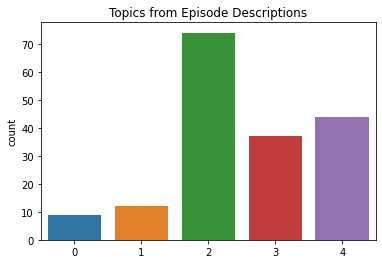

In [413]:
sns.countplot(x=doc_cluster)
plt.title("Topics from Episode Descriptions");
plt.savefig('Topics_from_episode_descriptions.png')